<a href="https://colab.research.google.com/github/Gcango/Teste_Modelos_Regressao_Linear/blob/main/Regressao_Linear_Previs%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo neste exercício foi criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.

Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.

Dados:
precos - Preços do imóveis
area - Área do imóvel
garagem - Número de vagas de garagem
banheiros - Número de banheiros
lareira - Número de lareiras
marmore - Se o imóvel possui acabamento em mármore branco (1) ou não (0)
andares - Se o imóvel possui mais de um andar (1) ou não (0)

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [6]:
dados = pd.read_csv("/content/HousePrices_HalfMil.csv", sep=';')

In [7]:
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


In [8]:
print(f"Este dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas ")

Este dataset possui 1000 linhas e 7 colunas 


In [10]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


Quais são mais correlacionadas com a variável dependete (Preço)?
Qual o relacionamento entre elas (positivo ou negativo)?
Existe correlação forte entre as variáveis explicativas?

In [11]:
dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


In [ ]:
#Analise Gráfica

In [13]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

#Parecem existir valores discrepantes (outliers)?
#O box plot apresenta alguma tendência?

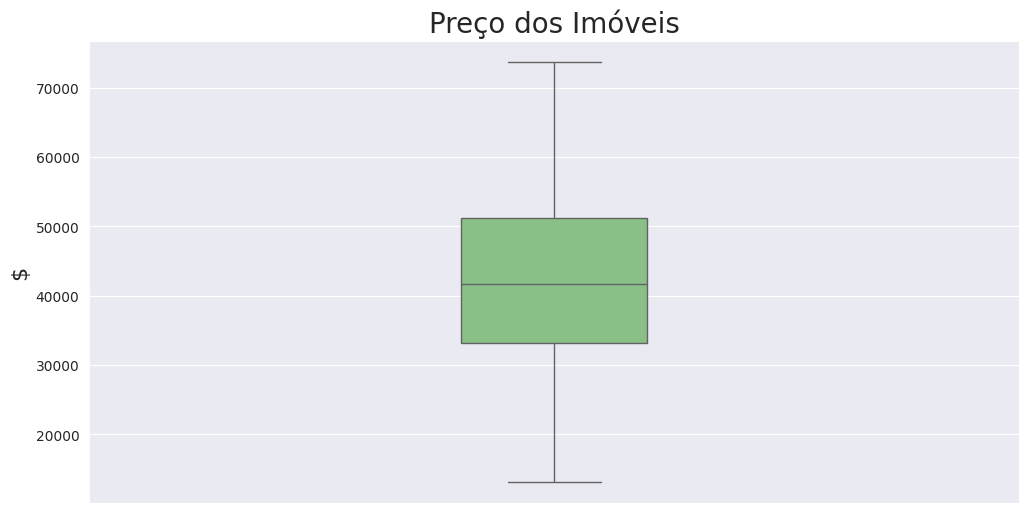

In [14]:
ax = sns.boxplot(data=dados['precos'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax;

In [ ]:
#investigação da variavel dependente.

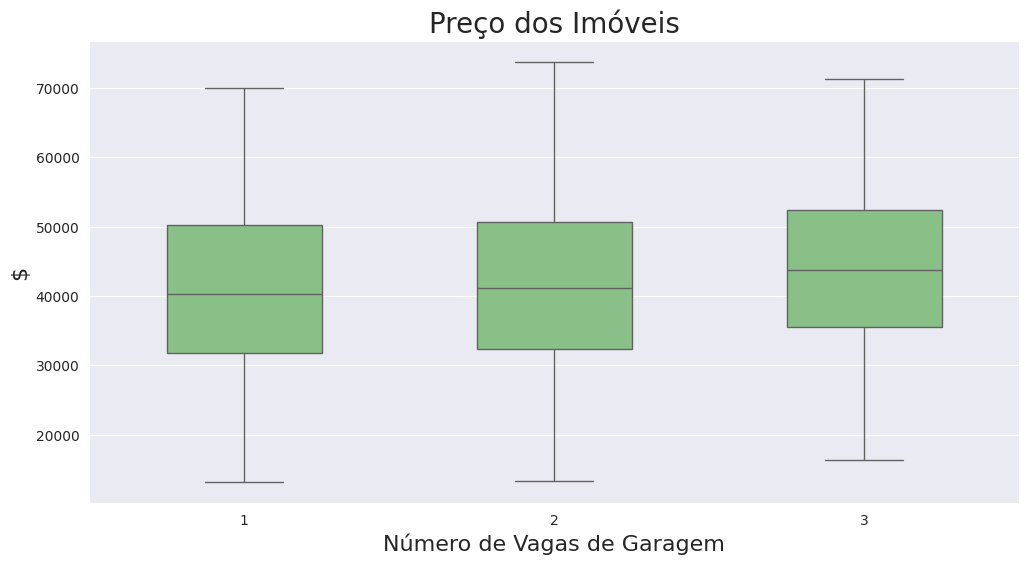

In [15]:
ax = sns.boxplot(y='precos', x='garagem', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Vagas de Garagem', fontsize=16)
ax;

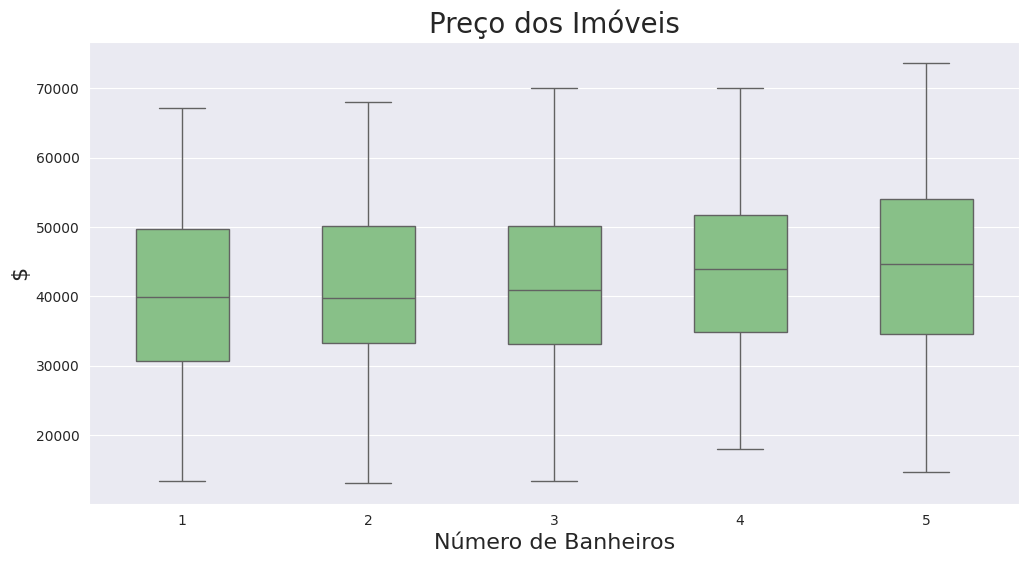

In [16]:
ax = sns.boxplot(y='precos', x='banheiros', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Banheiros', fontsize=16)
ax;

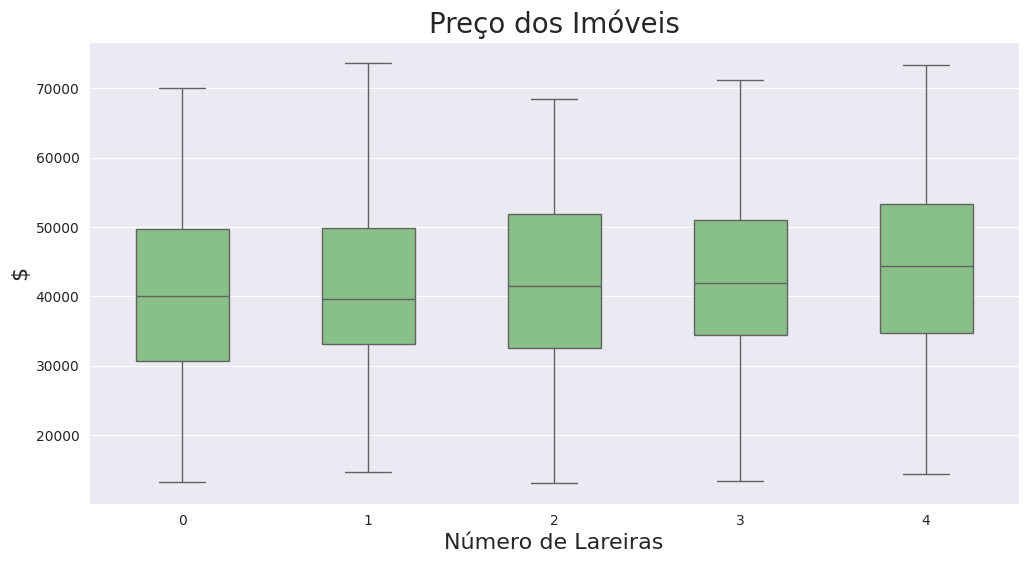

In [17]:
ax = sns.boxplot(y='precos', x='lareira', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Lareiras', fontsize=16)
ax;

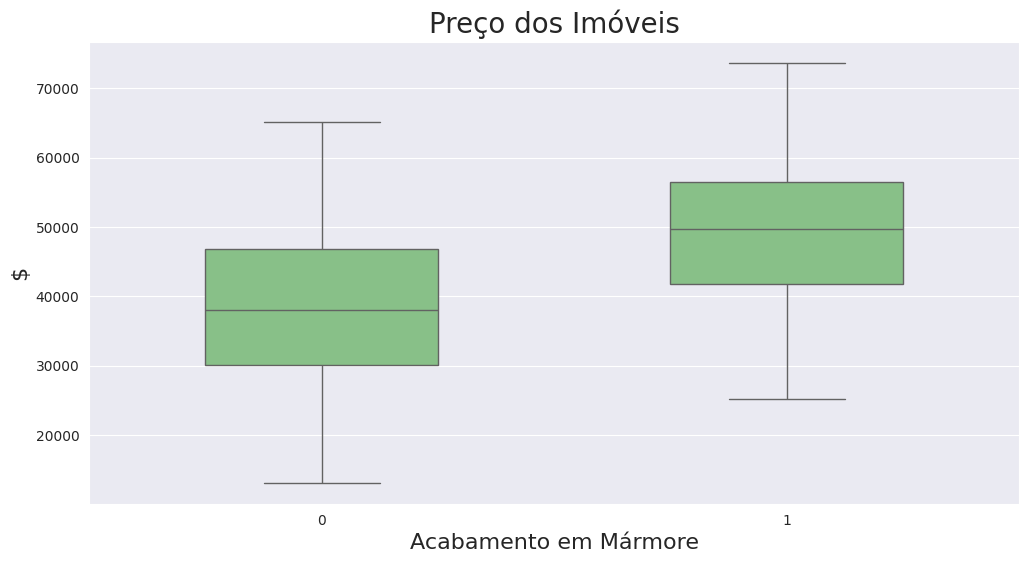

In [19]:
ax = sns.boxplot(y='precos', x='marmore', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Acabamento em Mármore', fontsize=16)
ax;

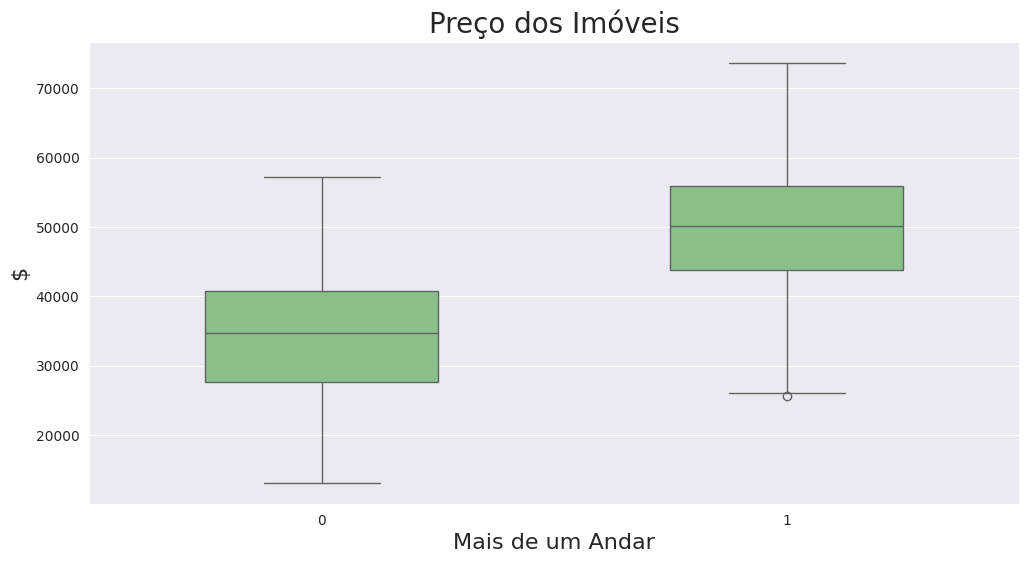

In [20]:
ax = sns.boxplot(y='precos', x='andares', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Mais de um Andar', fontsize=16)
ax;

Distribuição de frequências da variável dependente

A distribuição de frequências da variável dependente parece ser assimétrica?
É possível supor que a variável dependente segue uma distribuição normal?

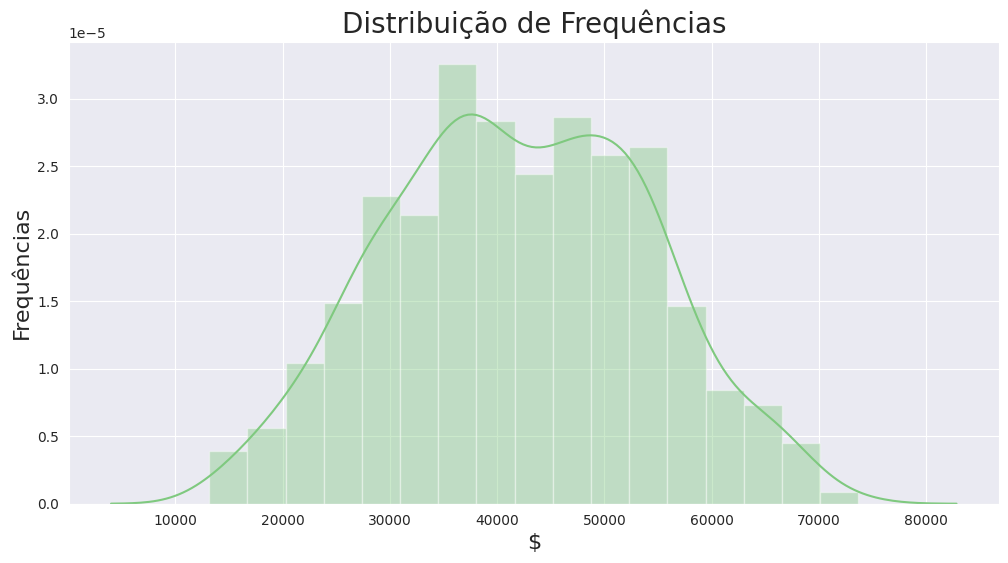

In [21]:
ax = sns.distplot(dados['precos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Frequências', fontsize=16)
ax.set_xlabel('$', fontsize=16)
ax;

Gráficos de dispersão entre as variáveis do dataset.

É possível identificar alguma relação linear entre as variáveis?
A relação é positiva ou negativa?
Compare com os resultados obtidos na matriz de correlação.

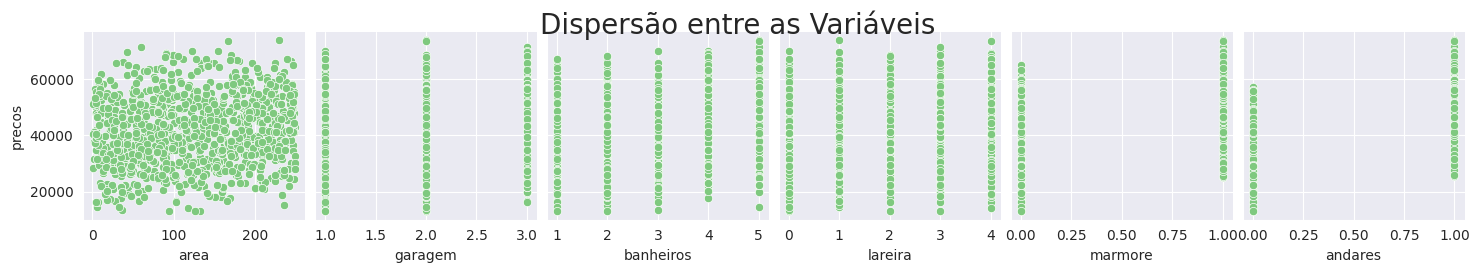

In [22]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax;

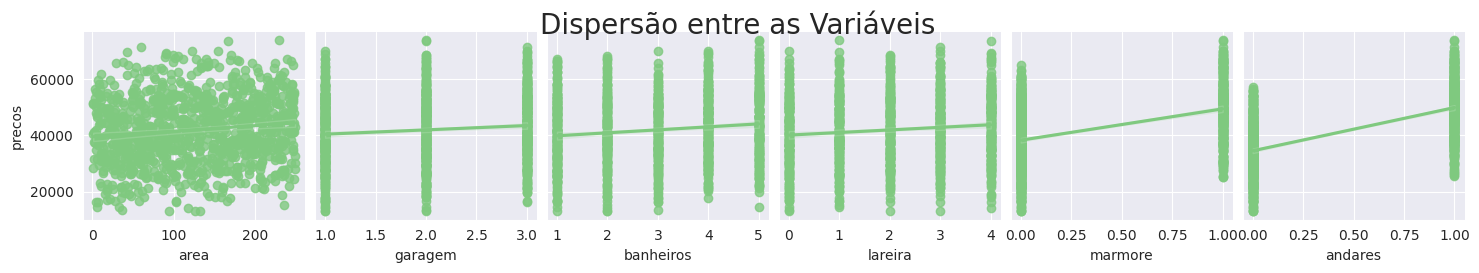

In [23]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax;

##Estimando um Modelo de Regressão Linear

In [26]:
y = dados['precos']

In [27]:
X = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

In [ ]:
#Criando os datasets de treino e de teste

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [ ]:
#Instanciando a classe LinearRegression()

In [31]:
modelo = LinearRegression()

In [32]:
modelo.fit(X_train, y_train)

LinearRegression()

Avaliação do modelo
O modelo apresenta um bom ajuste?
Você lembra o que representa o R²?
Qual medida podemos tomar para melhorar essa estatística?

In [33]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.64


In [34]:
y_previsto = modelo.predict(X_test)

In [35]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.67


In [ ]:
#Obtendo métricas para o modelo com Temperatura Máxima

In [36]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)
pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,50197019.50
REQM,7084.99
R²,0.67


In [37]:
import pickle

In [ ]:
#Salvando o modelo

In [38]:
output = open('modelo_preço', 'wb')
pickle.dump(modelo, output)
output.close()